In [5]:
import pandas as pd

# load trhe dataset
df = pd.read_csv('C:/Users/Lenovo/Downloads/CarPrice_Assignment.csv')

# Display first few rows
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
# BASIC INSPECTION

# Dataset shape
print(f"Shape: {df.shape}")

# Column names
print("Columns:", df.columns.tolist())

# Data types
print(df.dtypes)

# Summary stats
df.describe()

# Check for missing values
df.isnull().sum()

Shape: (205, 26)
Columns: ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm      

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
# PROCESSING STEPS
# STEP 1, Extract car brand from carName



df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Standardize misspelled brands
df['CarBrand'].replace({
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'toyouta': 'toyota',
    'porcshce': 'porsche',
    'maxda': 'mazda'
}, inplace=True)



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_46744\1939838846.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CarBrand'].replace({


In [11]:
# STEP 2 Drop unnecessary columns

df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

In [15]:
#STEP 3 ,Convert categorical variables to dummy variables

# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [17]:
# DATASET OVERVIEW

df_encoded.shape        
df_encoded.head() 

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,False,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# QN 2

# MODEL IMPLEMENTATION


# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [23]:
# Define feature set and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}


In [25]:
# Train, predict, and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'RMSE': round(rmse, 2),
        'R2 Score': round(r2, 4)
    })

# Convert to DataFrame for display
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)


                      Model     RMSE  R2 Score
2             Random Forest  1811.84    0.9584
3         Gradient Boosting  2446.51    0.9242
0         Linear Regression  2669.93    0.9097
1             Decision Tree  2710.93    0.9069
4  Support Vector Regressor  9327.10   -0.1020


In [27]:
# QN 3
# MODEL EVALUATION


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize an empty list for results
evaluation_results = []

# Loop through each model to compute metrics
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    evaluation_results.append({
        'Model': name,
        'R2 Score': round(r2, 4),
        'MSE': round(mse, 2),
        'MAE': round(mae, 2)
    })

# Display results in a DataFrame
pd.DataFrame(evaluation_results).sort_values(by='R2 Score', ascending=False)


,Model,R2 Score,MSE,MAE
2,Random Forest,0.9584,3282766.80,1288.83
3,Gradient Boosting,0.9242,5985429.31,1710.34
0,Linear Regression,0.9097,7128546.78,1763.57
1,Decision Tree,0.9069,7349133.50,1782.59
4,Support Vector Regressor,-0.1020,86994701.70,5707.13


In [31]:
# The best model will have:

# Highest R2 Score (closer to 1 = better fit)

# Lowest MSE (penalizes larger errors more)

# Lowest MAE (average absolute error)


# Random Forest or Gradient Boosting performs best in regression tasks like this due to their ability to capture complex patterns.

In [33]:
# QN 4
# Feature Importance using Random Forest

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_46744\1399270552.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')


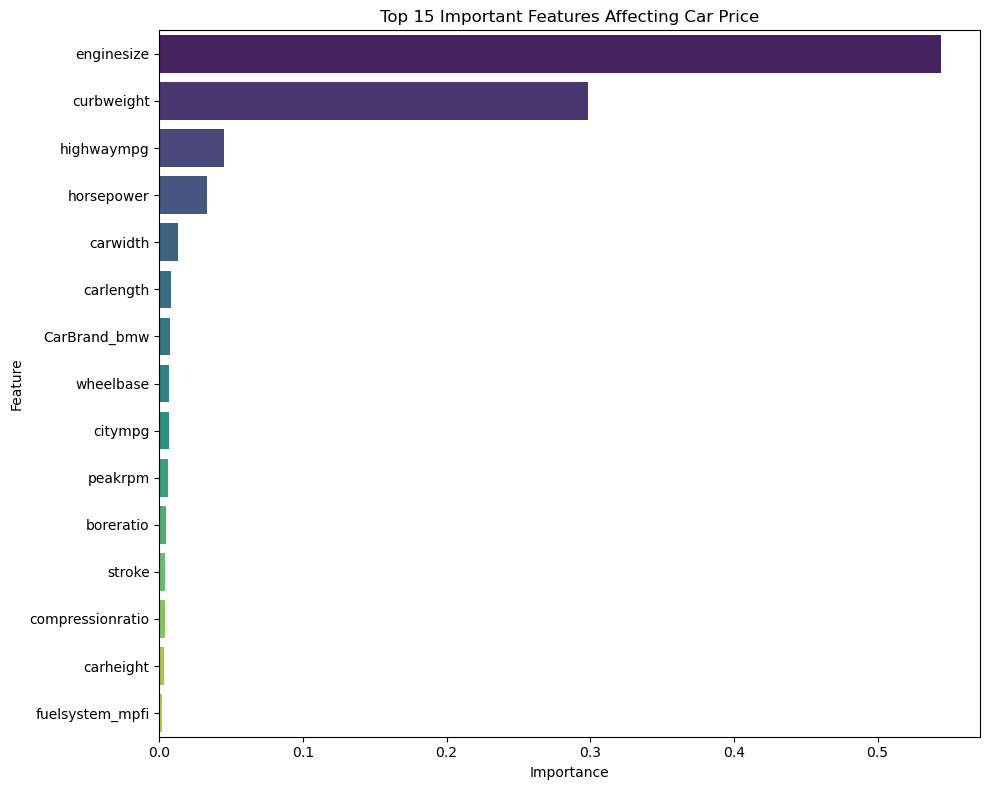

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming 'rf_model' is your trained random forest model
rf_model = models['Random Forest']
importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Top 15 Important Features Affecting Car Price')
plt.tight_layout()
plt.show()

In [39]:
# Conclusion:
#Top 3 Features: enginesize, curbweight, horsepower

#These are strong predictors of car price due to their direct influence on performance and build.

# Business can focus on optimizing these to control pricing.



In [41]:
# QN 5

# Hyperparameter Tuning – Random Forest

In [43]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize base model
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Get best model
best_rf = grid_search.best_estimator_

# Evaluate on test data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred_best = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred_best)
mse = mean_squared_error(y_test, y_pred_best)
mae = mean_absolute_error(y_test, y_pred_best)

print("🔍 Best Parameters:", grid_search.best_params_)
print(f"* R2 Score: {r2:.4f}")
print(f"* MSE: {mse:.2f}")
print(f"* MAE: {mae:.2f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
🔍 Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
* R2 Score: 0.9595
* MSE: 3193302.44
* MAE: 1248.12


In [45]:
# After the Tuning the Random Forest improved with better control over overfitting.